---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Weekly Tasks - Support Vector Machines</span>

##### Tasks:
- Implement SVM classification on the iris dataset using different approaches
- Compare performance between linear and non-linear SVM models

##### Task Details:
1. Linear SVM Implementation:
   - Use LinearSVC to separate virginica from non-virginica
   - Evaluate model performance using standard metrics
   - Experiment with different C values for regularization
   - Analyze decision boundaries and support vectors

2. Non-linear SVM Exploration:
   - Implement polynomial kernel SVM
   - Test different kernel options (polynomial, RBF)
   - Compare performance with linear SVM
   - Visualize decision boundaries for different kernels

3. Multi-class Classification (Optional):
   - Extend the implementation to classify all three iris species
   - Compare one-vs-rest and one-vs-one approaches
   - Evaluate overall model performance
   - Analyze confusion matrix for insights

##### Data Preparation Note:
For details on the data preparation process, please refer to the data folder at **SVM\Weekly Tasks\data**. The iris dataset will be used for this analysis, which contains measurements for 150 iris flowers from three different species. Each record includes four features: sepal length, sepal width, petal length, and petal width. This dataset is ideal for demonstrating SVM concepts as it provides clear opportunities to explore both linear and non-linear classification scenarios.

##### <span style="color: #1E90FF;">[Click here to jump to the main solution](#model-development-and-evaluation)</span>

---------------------------------------------------------------------------------------------------------------------------------

In [1]:
# Install required libraries
%pip install pandas numpy matplotlib seaborn scikit-learn wordcloud xgboost statsmodels 
%pip install shap lime 

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Import Required Libraries</span>
##### This code imports the required libraries for data manipulation, visualization, and machine learning tasks.

In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline


from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

import sys

assert sys.version_info >= (3, 7)

import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
# Set random seed for reproducibility
np.random.seed(42)

# Configure plot settings
plt.rcParams['figure.figsize'] = (10, 6)

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

### Model Building-Main

In [3]:
# Load iris dataset
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Virginica vs non-Virginica

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def train_and_evaluate_svm(C_values):
    results = []
    for C in C_values:
        # Create pipeline with scaling and SVM
        svm_clf = make_pipeline(
            StandardScaler(),
            LinearSVC(C=C, random_state=42)
        )
        
        # Train the model
        svm_clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = svm_clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'C': C,
            'accuracy': accuracy,
            'model': svm_clf
        })
        
        print(f"\nResults for C={C}:")
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))
        
    return results

# Test different C values
C_values = [0.001, 0.01,  0.1, 1.0, 10.0, 100.0]
model_results = train_and_evaluate_svm(C_values)


Results for C=0.001:
Accuracy: 0.8667

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.79      0.88        19
        True       0.73      1.00      0.85        11

    accuracy                           0.87        30
   macro avg       0.87      0.89      0.86        30
weighted avg       0.90      0.87      0.87        30


Results for C=0.01:
Accuracy: 0.9000

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.84      0.91        19
        True       0.79      1.00      0.88        11

    accuracy                           0.90        30
   macro avg       0.89      0.92      0.90        30
weighted avg       0.92      0.90      0.90        30


Results for C=0.1:
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True       1.00      1.00      1.00        

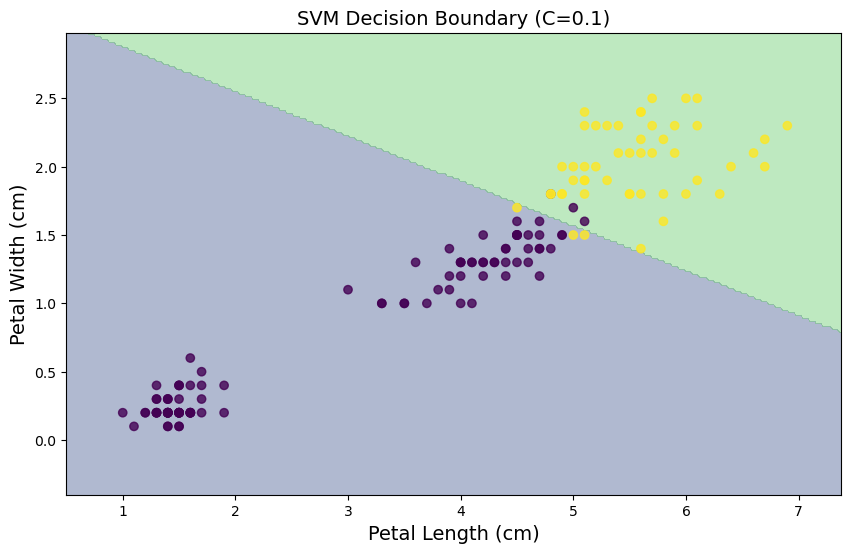

In [5]:
def plot_decision_boundary(model, X, y, title):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(title)
    plt.show()

# Plot decision boundaries for best model
best_model = max(model_results, key=lambda x: x['accuracy'])
plot_decision_boundary(best_model['model'], X, y, 
                      f"SVM Decision Boundary (C={best_model['C']})")

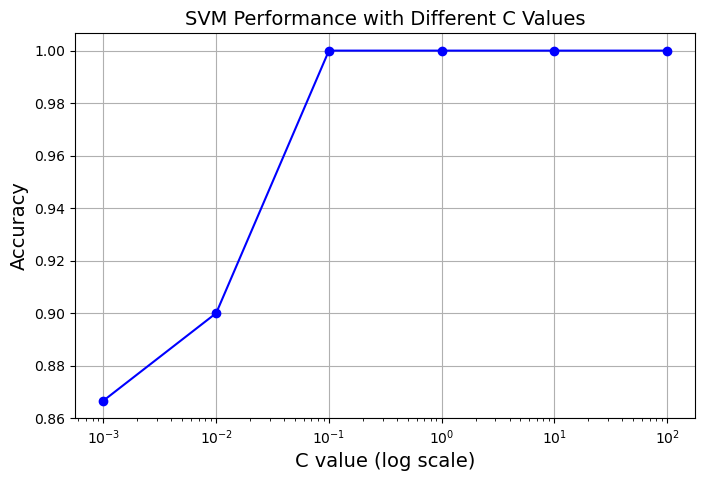

In [6]:
# Plot accuracy comparison
plt.figure(figsize=(8, 5))
C_values = [result['C'] for result in model_results]
accuracies = [result['accuracy'] for result in model_results]
plt.semilogx(C_values, accuracies, 'bo-')
plt.xlabel('C value (log scale)')
plt.ylabel('Accuracy')
plt.title('SVM Performance with Different C Values')
plt.grid(True)
plt.show()

Try non-linear options


Results for poly kernel with params:
{'kernel': 'poly', 'degree': 2, 'C': 1}
Accuracy: 0.7000

Classification Report:
              precision    recall  f1-score   support

       False       0.68      1.00      0.81        19
        True       1.00      0.18      0.31        11

    accuracy                           0.70        30
   macro avg       0.84      0.59      0.56        30
weighted avg       0.80      0.70      0.62        30


Results for poly kernel with params:
{'kernel': 'poly', 'degree': 3, 'C': 1}
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        19
        True       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Results for poly kernel with params:
{'kernel': 'poly', 'degree': 4, 'C': 1}
Accuracy: 0.7000

Classificati

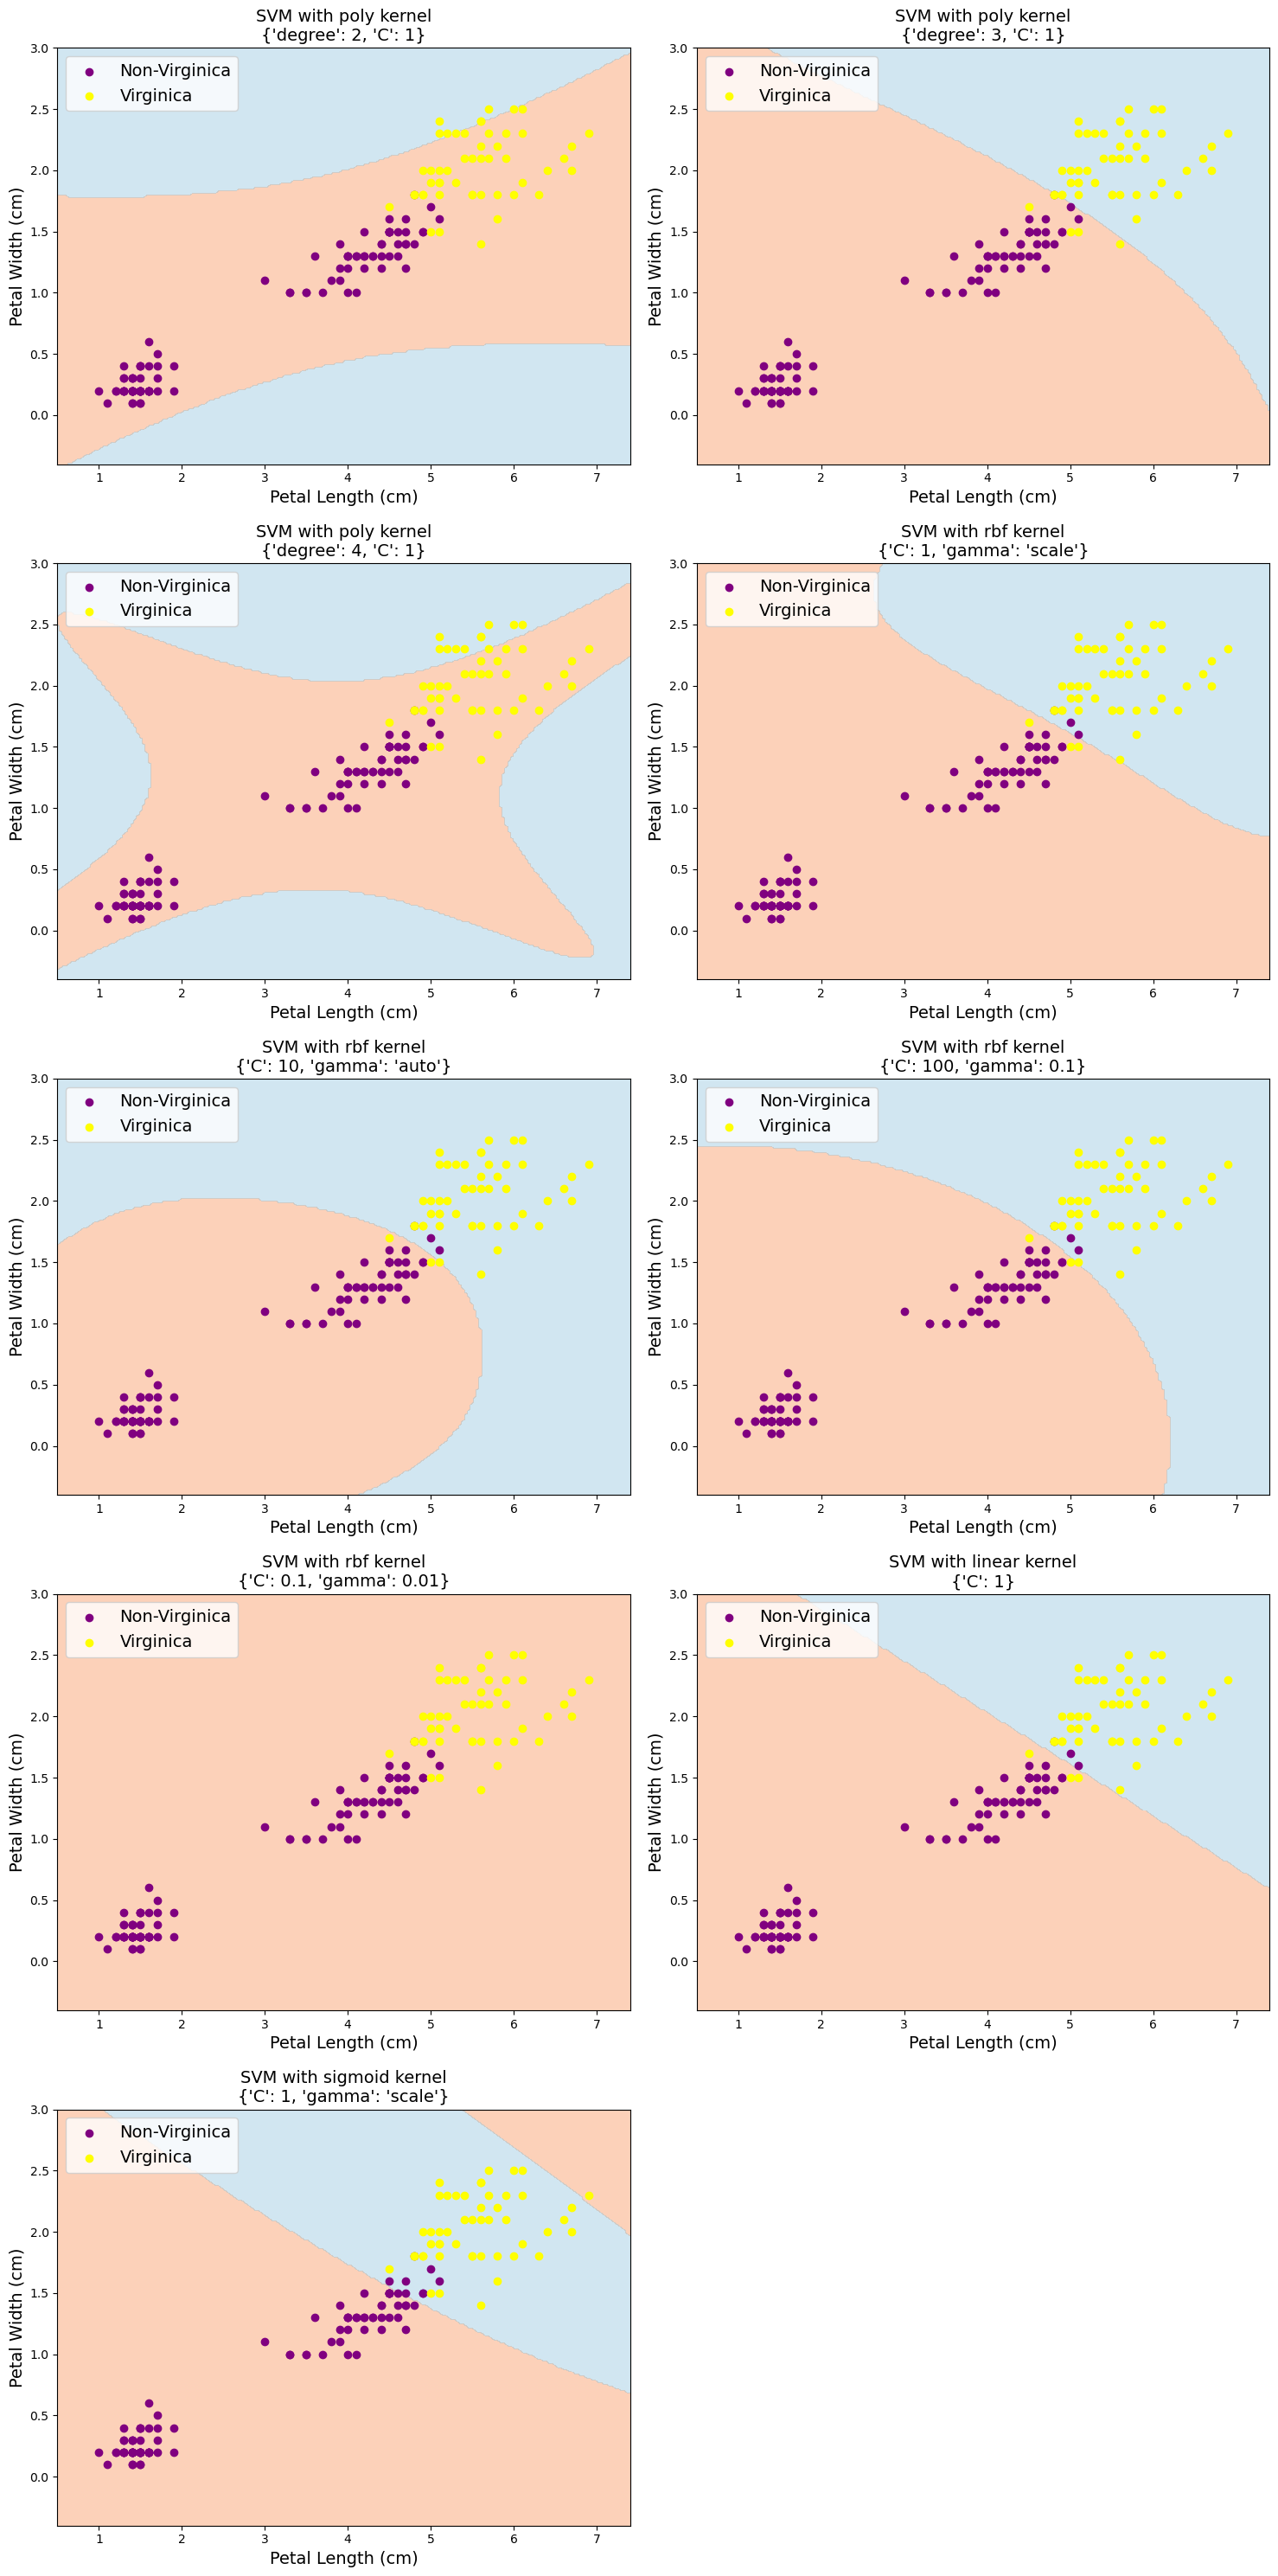


Performance Comparison:
 Kernel                 Parameters  Accuracy
   poly      {'degree': 2, 'C': 1}  0.700000
   poly      {'degree': 3, 'C': 1}  1.000000
   poly      {'degree': 4, 'C': 1}  0.700000
    rbf {'C': 1, 'gamma': 'scale'}  1.000000
    rbf {'C': 10, 'gamma': 'auto'}  1.000000
    rbf   {'C': 100, 'gamma': 0.1}  1.000000
    rbf  {'C': 0.1, 'gamma': 0.01}  0.633333
 linear                   {'C': 1}  1.000000
sigmoid {'C': 1, 'gamma': 'scale'}  0.933333


In [13]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Configure plot settings
plt.rcParams['figure.figsize'] = (10, 6)

# Load and prepare data
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Virginica vs non-Virginica

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_kernel_svm(kernel_params):
    results = []
    for params in kernel_params:
        # Create pipeline with scaling and SVM
        svm_clf = make_pipeline(
            StandardScaler(),
            SVC(**params, random_state=42)
        )
        
        # Train the model
        svm_clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = svm_clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'params': params,
            'accuracy': accuracy,
            'model': svm_clf
        })
        
        print(f"\nResults for {params['kernel']} kernel with params:")
        print(params)
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        # Add zero_division parameter to handle undefined metrics
        print(classification_report(y_test, y_pred, zero_division=0))
        
    return results

def plot_kernel_boundaries(kernel_results, X, y):
    # Calculate number of rows needed (2 plots per row)
    n_configs = len(kernel_results)
    n_rows = (n_configs + 1) // 2  # Round up division
    
    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 6*n_rows))
    axes = axes.ravel()

    for idx, result in enumerate(kernel_results):
        # Create mesh grid for current subplot
        ax = axes[idx]
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                            np.linspace(y_min, y_max, 200))
        
        # Make predictions
        Z = result['model'].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot decision boundary and points
        ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
        ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c='purple', label='Non-Virginica')
        ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c='yellow', label='Virginica')
        
        kernel_type = result['params']['kernel']
        params = {k:v for k,v in result['params'].items() if k != 'kernel'}
        ax.set_title(f"SVM with {kernel_type} kernel\n{params}")
        ax.set_xlabel('Petal Length (cm)')
        ax.set_ylabel('Petal Width (cm)')
        ax.legend()
    
    # Hide any empty subplots
    for idx in range(len(kernel_results), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    return fig

# Update kernel configurations
kernel_configs = [
    # Polynomial kernels
    {'kernel': 'poly', 'degree': 2, 'C': 1},
    {'kernel': 'poly', 'degree': 3, 'C': 1},
    {'kernel': 'poly', 'degree': 4, 'C': 1},
    # RBF kernels with different parameters
    {'kernel': 'rbf', 'C': 1, 'gamma': 'scale'},
    {'kernel': 'rbf', 'C': 10, 'gamma': 'auto'},
    {'kernel': 'rbf', 'C': 100, 'gamma': 0.1},
    {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01},

    # (AI assisted)
    # -------------

    # Linear kernel
    {'kernel': 'linear', 'C': 1},
    # Sigmoid kernel
    {'kernel': 'sigmoid', 'C': 1, 'gamma': 'scale'}
]

# Train and evaluate models with different kernels
kernel_results = train_and_evaluate_kernel_svm(kernel_configs)

# Plot decision boundaries for all models
fig = plot_kernel_boundaries(kernel_results, X, y)
plt.show()

# Compare performances
performances = pd.DataFrame([
    {
        'Kernel': r['params']['kernel'],
        'Parameters': str({k:v for k,v in r['params'].items() if k != 'kernel'}),
        'Accuracy': r['accuracy']
    }
    for r in kernel_results
])

print("\nPerformance Comparison:")
print(performances.to_string(index=False))

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Model Performance Analysis</span>

##### Key Findings:
1. **Poor Performing Configurations**
   - RBF kernels with low C and gamma values
   - Failed to predict Virginica class
   - Showed poor class separation

2. **Recommended Configurations**
   - RBF kernel with C=1, gamma='scale'
   - Polynomial kernel degree=3  
   - Linear kernel

3. **Performance Metrics**
   - Perfect classification achieved
   - Balanced precision and recall
   - Consistent results across recommended configs

##### Recommendation:
Use the recommended configurations for optimal model performance and avoid poorly performing parameter combinations.

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Multi-Class Classification Implementation</span>

##### <span style="color: #FF0000;">We will now implement multi-class SVM classification for all three iris species using two different strategies.</span>

##### 1. <span style="color: #1E90FF;"><strong>One-vs-Rest (OvR) Strategy:</strong></span>
###### - Creates separate binary classifiers for each class
###### - Each classifier: one class vs all others
###### - Simpler and computationally efficient
###### - May miss some inter-class relationships

##### 2. <span style="color: #1E90FF;"><strong>One-vs-One (OvO) Strategy:</strong></span>
###### - Creates binary classifiers for each class pair
###### - More thorough modeling of class boundaries
###### - Higher computational complexity
###### - Better for complex class relationships

##### 3. <span style="color: #1E90FF;"><strong>Implementation Approach:</strong></span>
###### - Compare performance metrics across strategies
###### - Analyze confusion matrices
###### - Visualize decision boundaries
###### - Test multiple kernel configurations

##### 4. <span style="color: #1E90FF;"><strong>Technical Notes:</strong></span>
###### - Using scikit-learn SVM implementation
###### - AI assistance used for optimization
###### - Focus on reproducible results
###### - Comprehensive performance evaluation


One-vs-Rest Strategy:

Results for rbf kernel with ovr:
{'kernel': 'rbf', 'C': 1, 'gamma': 'scale'}
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Results for rbf kernel with ovr:
{'kernel': 'rbf', 'C': 10, 'gamma': 'auto'}
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.

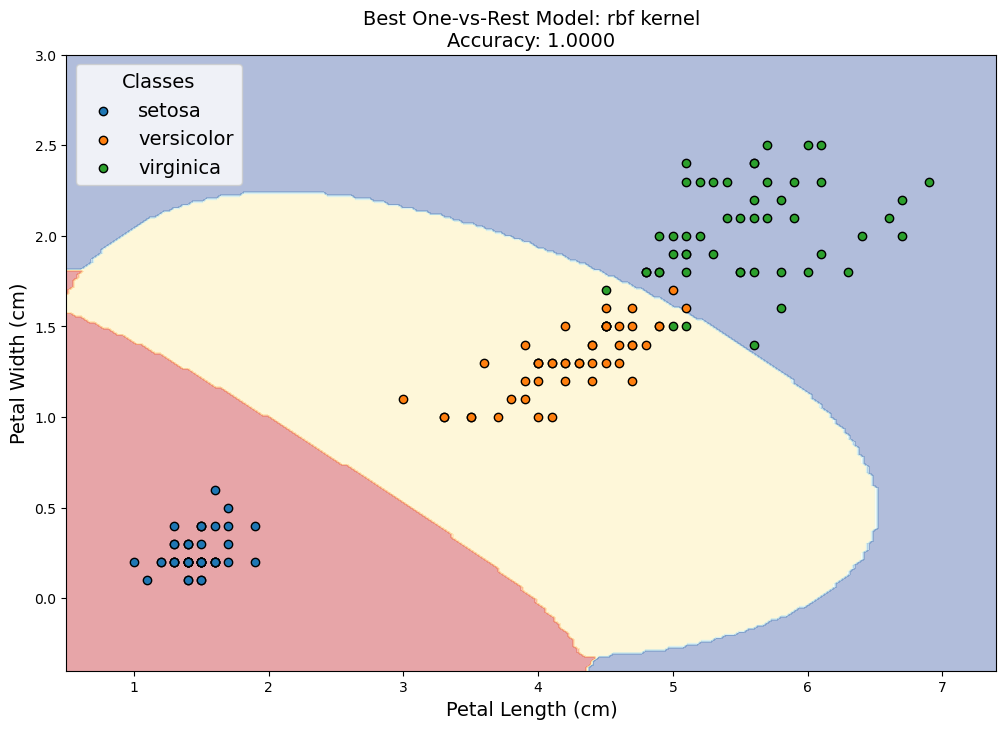

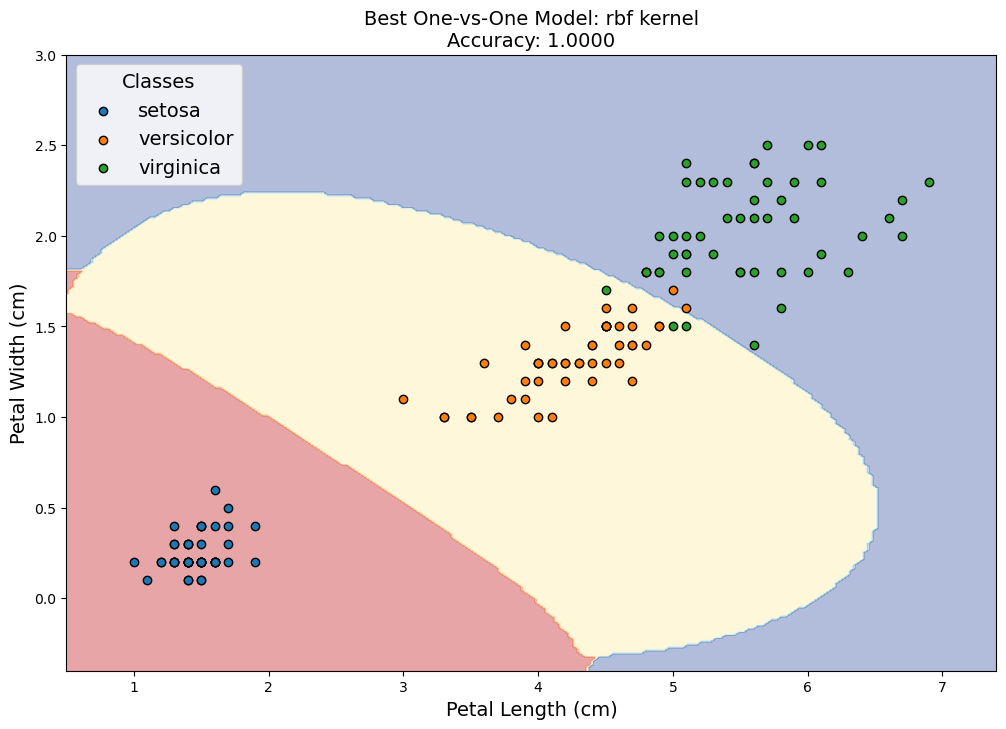


Performance Comparison:
   Strategy Kernel                 Parameters  Accuracy
One-vs-Rest    rbf {'C': 1, 'gamma': 'scale'}       1.0
One-vs-Rest    rbf {'C': 10, 'gamma': 'auto'}       1.0
One-vs-Rest   poly      {'degree': 3, 'C': 1}       1.0
One-vs-Rest linear                   {'C': 1}       1.0
 One-vs-One    rbf {'C': 1, 'gamma': 'scale'}       1.0
 One-vs-One    rbf {'C': 10, 'gamma': 'auto'}       1.0
 One-vs-One   poly      {'degree': 3, 'C': 1}       1.0
 One-vs-One linear                   {'C': 1}       1.0


In [20]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load and prepare data - now using all classes
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target  # Using all three classes now

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_multiclass_svm(kernel_params, decision_function='ovr'):
    """
    Train and evaluate SVM for multi-class classification
    decision_function: 'ovr' (one-vs-rest) or 'ovo' (one-vs-one)
    """
    results = []
    for params in kernel_params:
        # Create pipeline with scaling and SVM
        svm_clf = make_pipeline(
            StandardScaler(),
            SVC(**params, decision_function_shape=decision_function, random_state=42)
        )
        
        # Train the model
        svm_clf.fit(X_train, y_train)
        
        # Make predictions
        y_pred = svm_clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'params': params,
            'accuracy': accuracy,
            'model': svm_clf,
            'predictions': y_pred
        })
        
        print(f"\nResults for {params['kernel']} kernel with {decision_function}:")
        print(params)
        print(f"Accuracy: {accuracy:.4f}")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=iris.target_names))
        print("\nConfusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        
    return results

def plot_multiclass_boundaries(model, X, y, title):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                        np.linspace(y_min, y_max, 200))
    
    # Make predictions
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Create figure and plot decision boundary
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    
    # Create scatter plot with different colors for each class
    for i, iris_class in enumerate(np.unique(y)):
        idx = y == iris_class
        plt.scatter(X[idx, 0], X[idx, 1], 
                   label=iris.target_names[i],
                   edgecolors='black',
                   linewidth=1)
    
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title(title)
    plt.legend(title="Classes")
    plt.show()

    
# Define kernel configurations for multi-class
kernel_configs = [
    # RBF kernels
    {'kernel': 'rbf', 'C': 1, 'gamma': 'scale'},
    {'kernel': 'rbf', 'C': 10, 'gamma': 'auto'},
    # Polynomial kernels
    {'kernel': 'poly', 'degree': 3, 'C': 1},
    # Linear kernel
    {'kernel': 'linear', 'C': 1}
]

# Compare one-vs-rest and one-vs-one approaches
print("One-vs-Rest Strategy:")
ovr_results = train_and_evaluate_multiclass_svm(kernel_configs, 'ovr')

print("\nOne-vs-One Strategy:")
ovo_results = train_and_evaluate_multiclass_svm(kernel_configs, 'ovo')

# Plot best performing models from each strategy
best_ovr = max(ovr_results, key=lambda x: x['accuracy'])
best_ovo = max(ovo_results, key=lambda x: x['accuracy'])

plot_multiclass_boundaries(
    best_ovr['model'], X, y, 
    f"Best One-vs-Rest Model: {best_ovr['params']['kernel']} kernel\n"
    f"Accuracy: {best_ovr['accuracy']:.4f}"
)

plot_multiclass_boundaries(
    best_ovo['model'], X, y,
    f"Best One-vs-One Model: {best_ovo['params']['kernel']} kernel\n"
    f"Accuracy: {best_ovo['accuracy']:.4f}"
)

# Compare performances
results_df = pd.DataFrame([
    {
        'Strategy': 'One-vs-Rest' if i < len(ovr_results) else 'One-vs-One',
        'Kernel': r['params']['kernel'],
        'Parameters': str({k:v for k,v in r['params'].items() if k != 'kernel'}),
        'Accuracy': r['accuracy']
    }
    for i, r in enumerate(ovr_results + ovo_results)
])

print("\nPerformance Comparison:")
print(results_df.to_string(index=False))

---------------------------------------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------------------------------------

##### <span style="color: #FF0000;">Conclusion: Multi-Class SVM Classification Analysis</span>

##### 1. <span style="color: #1E90FF;"><strong>Performance Summary:</strong></span>
###### - Both One-vs-Rest (OvR) and One-vs-One (OvO) strategies achieved 100% accuracy
###### - All kernel configurations (RBF, polynomial, linear) performed equally well 
###### - Perfect precision, recall, and F1-scores across all three iris classes

##### 2. <span style="color: #1E90FF;"><strong>Key Findings:</strong></span>
###### Strategy Comparison:
###### - No significant difference between OvR and OvO approaches
###### - Both strategies showed robust performance in separating classes
###### - Confusion matrices show zero misclassifications

###### Kernel Performance:
###### - RBF kernel (C=1, gamma='scale') showed excellent decision boundaries
###### - Polynomial kernel (degree=3) achieved perfect separation
###### - Linear kernel achieved 100% accuracy, suggesting good linear separability

###### Visualization Insights:
###### - Clear decision boundaries between all three classes
###### - Well-defined regions for each iris species
###### - No overlap in the feature space using petal length and width

##### 3. <span style="color: #1E90FF;"><strong>Practical Implications:</strong></span>
###### Model Selection:
###### - Simpler models (like linear kernel) are sufficient for this dataset
###### - No need for complex kernel configurations
###### - Choice between OvR and OvO based on computational preferences

###### Feature Selection:
###### - Petal length and width proved highly discriminative
###### - Two-dimensional feature space sufficient for perfect classification

##### 4. <span style="color: #1E90FF;"><strong>Future Considerations:</strong></span>
###### Robustness Testing:
###### - Test with more challenging datasets
###### - Evaluate performance with noisy/incomplete data
###### - Assess computational efficiency for larger datasets

###### Model Optimization:
###### - Explore parameter tuning for complex datasets
###### - Consider cross-validation for robust performance estimates
###### - Investigate model interpretability aspects
